In [0]:
# Cant use the Google Drive because it is space limited, so cant store large files there. It is also not a shared project resource
# Load the Drive helper and mount
#from google.colab import drive

# This will prompt for authorization.
#drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
# Tried to clone the Git repo but requires username and pwd in the code. Not ideal. 
# For the script, I intend to upload the file from the local machine, and down load it later into the git clone on my machine
# Clone the git repo
# ! git clone https://github.com/fellowship/platform-demos3

Cloning into 'platform-demos3'...
fatal: could not read Username for 'https://github.com': No such device or address


In [2]:
# Tried to upload data file from local machine, but this is not ideal
# from google.colab import files
#uploaded = files.upload()

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving metadata_0to10k.json to metadata_0to10k.json
User uploaded file "metadata_0to10k.json" with length 8112678 bytes


In [0]:
# For data, use the GS bucket. Its a project shared location (gs://platform-ai-research/datasets/ProductNet)
# Will need to login to access the bucket. The foloowing lines of code do just that
from google.colab import auth
auth.authenticate_user()

In [22]:
# Make sure that we are logged in - will list out all the files in the directory
!gsutil ls gs://platform-ai-research/datasets/ProductNet

gs://platform-ai-research/datasets/ProductNet/metadata_0to500k.json


# We now have access to the datafile

In [0]:
!pip install fastai

import numpy as np
import pandas as pd
import requests
import json
import ast
import os

from fastai.vision import *

#PATH='/content/drive/My Drive/Colab Notebooks/productnet'
#os.chdir(PATH)

In [24]:
# Copy the datafile to the Colab local dir
!gsutil cp gs://platform-ai-research/datasets/ProductNet/metadata_0to500k.json metadata_0to500k.json

Copying gs://platform-ai-research/datasets/ProductNet/metadata_0to500k.json...
| [1 files][625.0 MiB/625.0 MiB]                                                
Operation completed over 1 objects/625.0 MiB.                                    


In [0]:
# File name
file = 'metadata_0to500k.json'

data = []
for line in open(file, 'r'):
    #data.append(json.loads(line))  # this works for JSON 
    data.append(ast.literal_eval(line))  # JSON but single quotes instead of double
    
# Convert to dataframe, and clean up
df = pd.DataFrame.from_dict(data)    

In [0]:
# Remove columns that we do not need
df.drop(['brand', 'price', 'related', 'salesRank'], axis=1, inplace=True)

In [0]:
# Fill in the NaN with empty string
df.fillna(value='', axis='columns', inplace=True)

In [0]:
# Flatten the categories list of list so it becomes easier to search
df.categories = df.categories.apply(np.ravel)

def custom_flat(entry):
    if isinstance(entry[0], list):
        clist = []
        for i in range(len(entry)):
          clist += entry[i]
        return clist
    else:
      return list(entry)
    
df.categories = df.categories.apply(custom_flat)

In [29]:
df.head()

,asin,categories,description,imUrl,title
0,0001048791,[Books],,http://ecx.images-amazon.com/images/I/51MKP0T4...,"The Crucible: Performed by Stuart Pankin, Jero..."
1,0000143561,"[Movies & TV, Movies]","3Pack DVD set - Italian Classics, Parties and ...",http://g-ecx.images-amazon.com/images/G/01/x-s...,"Everyday Italian (with Giada de Laurentiis), V..."
2,0000037214,"[Clothing, Shoes & Jewelry, Girls, Clothing, S...",,http://ecx.images-amazon.com/images/I/31mCncNu...,Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...
3,0000032069,"[Sports & Outdoors, Other Sports, Dance, Cloth...",,http://ecx.images-amazon.com/images/I/51EzU6qu...,Adult Ballet Tutu Cheetah Pink
4,0000031909,"[Sports & Outdoors, Other Sports, Dance]",High quality 3 layer ballet tutu. 12 inches in...,http://ecx.images-amazon.com/images/I/41xBoP0F...,Girls Ballet Tutu Neon Pink


In [0]:
# imUrls = df.imUrl.tolist()
# asins = df.asin.tolist()

# %%time
# for url_id in zip(imUrls, asins):
#   url = url_id[0] # url of image
#   asin = url_id[1] # asin of image
#   filename = f'{PATH}/images/' + asin + '.jpg'
  
#   try:
#     r = requests.get(url, allow_redirects=True)
#     open(filename, 'wb').write(r.content)
    
#   except Exception as e:
#     with open(f"{PATH}/missing.txt", "a") as f:
#       f.write(asin+'\n')

In [0]:
def create_labels(labels):
    s = ', '
    s = s.join(labels)
    return s

# df.categories = df.categories.astype(str)  
  
df.categories = df.categories.apply(create_labels)

In [31]:
df.head()

,asin,categories,description,imUrl,title
0,0001048791,Books,,http://ecx.images-amazon.com/images/I/51MKP0T4...,"The Crucible: Performed by Stuart Pankin, Jero..."
1,0000143561,"Movies & TV, Movies","3Pack DVD set - Italian Classics, Parties and ...",http://g-ecx.images-amazon.com/images/G/01/x-s...,"Everyday Italian (with Giada de Laurentiis), V..."
2,0000037214,"Clothing, Shoes & Jewelry, Girls, Clothing, Sh...",,http://ecx.images-amazon.com/images/I/31mCncNu...,Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...
3,0000032069,"Sports & Outdoors, Other Sports, Dance, Clothi...",,http://ecx.images-amazon.com/images/I/51EzU6qu...,Adult Ballet Tutu Cheetah Pink
4,0000031909,"Sports & Outdoors, Other Sports, Dance",High quality 3 layer ballet tutu. 12 inches in...,http://ecx.images-amazon.com/images/I/41xBoP0F...,Girls Ballet Tutu Neon Pink


In [0]:
df2 = df[~df.categories.str.contains('Books')]

In [0]:
tfms = get_transforms(max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 1 to 499999
Data columns (total 5 columns):
asin           1352 non-null object
categories     1352 non-null object
description    1352 non-null object
imUrl          1352 non-null object
title          1352 non-null object
dtypes: object(5)
memory usage: 63.4+ KB


In [38]:
 df_labels = df[['asin', 'categories']]

 df_labels = df_labels.rename({'categories': 'labels'})

 df_labels.head()

 missing_labels = df_labels[df_labels['categories'] == ''].index

 lineList = [line.rstrip('\n') for line in open(f"{PATH}/missing.txt")]
 missing_indices = df_labels[df_labels.asin.isin(lineList)].index

 df_labels.drop(missing_labels, axis=0, inplace=True)

 df_labels.drop(missing_indices, axis=0, inplace=True)

 df_labels[df_labels['categories'] == '']

 df_labels.shape

df_labels.to_csv('train_v2.csv', index=False)

NameError: ignored

In [0]:
np.random.seed(42)
src = (ImageList.from_csv(PATH, 'train_v2.csv', folder='images_metadata_0to10k', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [0]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

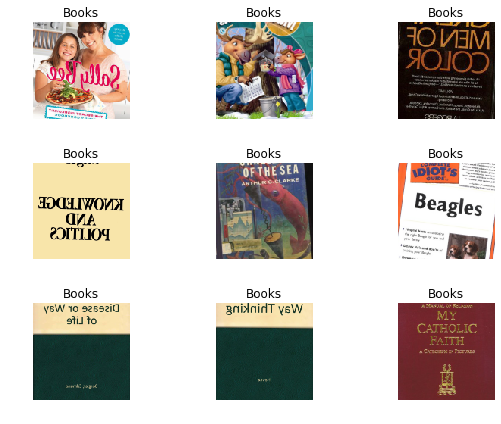

In [0]:
data.show_batch(rows=3, figsize=(8,6))